In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
import pandas as pd

from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent
from cosmic.evolve import Evolve

In [5]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [6]:
ZMsun = 0.012

Zarray = np.array([1,1/2,1/10,1/20])

In [37]:
bh_ini_zlist = []
bh_fin_zlist = []

In [38]:
for z in Zarray:
    print(z)
    
    InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='kroupa93', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=z*ZMsun, size=10000)
    bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)
    
    bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
    bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)
    
    bh_ini_m1 = []
    #bh_ini_m2 = []

    for indx in bh_index_1:
        bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
    bh_ini_m1 = np.array(bh_ini_m1)
    #for indx in bh_index_2:
        #bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])
    
    #bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
    #bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)
    
    #plt.scatter(bh_ini_m1,bh_final_m1,s=0.9,label="$z = %3.5f Z_{sun}$"%(z))
    
    bh_ini_zlist.append(bh_ini_m1)
    bh_fin_zlist.append(bh_final_m1)


1.0


/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
       kstar_1  kstar_2      mass_1     mass_2      porb       ecc  \
174        1.0      1.0  123.370751  25.750951  1.474975  0.003526   
290        1.0      1.0  109.768519  64.156673  1.763674  0.207741   
402        1.0      1.0  102.135905  69.870653  1.913302  0.570966   
438        1.0      1.0  114.633839  53.001637  1.597779  0.038900   
641        1.0      1.0   94.208970  32.260638  1.718729  0.402150   
787        1.0      1.0   67.554279  28.713562  1.436025  0.826295   
810        1.0      1.0   98.449534  15.951996  1.521085  0.519026   
1540       1.0      1.0   82.087362  42.742432  1.453120  0.119430   
1694       1.0      1.0   65.763093  36.249712  1.437796  0.716286   
3120       1.0      1.0   46.982673  46.518428  1.438991  0.403077   
3365       1.0      1.0  103.234518  77.194875  1.419360 

0.5


/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
      kstar_1  kstar_2      mass_1      mass_2      porb       ecc  \
782       1.0      1.0   97.718441   84.027902  1.556001  0.309869   
976       1.0      1.0  130.726383   52.393450  1.592936  0.755227   
2876      1.0      1.0  136.766513  112.559082  1.499938  0.002436   
3068      1.0      1.0   89.632588   64.086885  1.570977  0.736500   
3137      1.0      1.0  116.229692   55.540127  1.575509  0.200163   
3369      1.0      1.0  110.902050   66.685697  1.670181  0.172746   
3603      1.0      1.0  136.759556  117.460540  1.689602  0.466007   
4261      1.0      1.0  110.982582   43.994518  1.599033  0.120947   
4621      1.0      1.0   71.881449   68.761078  1.471006  0.507298   
5061      1.0      1.0   81.687650   53.471885  1.506883  0.438378   
5328      1.0      1.0  106.003261   66.445921  1.634671 

0.1
0.05


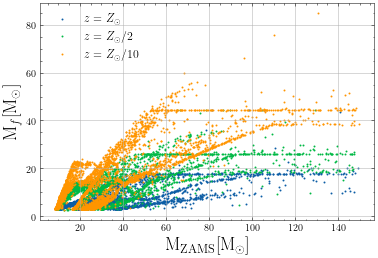

In [60]:
plt.scatter(bh_ini_zlist[0],bh_fin_zlist[0],s=0.9,label="$z = Z_{\odot}$"%(Zarray[0]))
plt.scatter(bh_ini_zlist[1],bh_fin_zlist[1],s=0.9,label="$z = Z_{\odot}/2$"%(Zarray[1]))
plt.scatter(bh_ini_zlist[2],bh_fin_zlist[2],s=0.9,label="$z = Z_{\odot}/10$"%(Zarray[2]))
#plt.scatter(bh_ini_zlist[3],bh_fin_zlist[3],s=0.9,label="$z = %3.5f Z_{sun}$"%(Zarray[3]))

plt.legend(prop={'size' : 12})
plt.xlabel(r'M$_{\text{ZAMS}}$[M$_{\odot}$]',size=18)
plt.ylabel(r'M$_{f}$[M$_{\odot}$]',size=18)
plt.grid()

plt.savefig("Plots/MivsMf_varying_Metallicity.pdf")

In [68]:
ZMsun

0.012

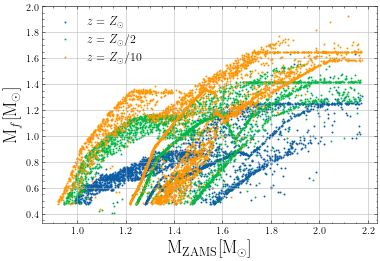

In [72]:
plt.scatter(np.log10(bh_ini_zlist[0]),np.log10(bh_fin_zlist[0]),s=0.9,label="$z = Z_{\odot}$"%(Zarray[0]))
plt.scatter(np.log10(bh_ini_zlist[1]),np.log10(bh_fin_zlist[1]),s=0.9,label="$z = Z_{\odot}/2$"%(Zarray[1]))
plt.scatter(np.log10(bh_ini_zlist[2]),np.log10(bh_fin_zlist[2]),s=0.9,label="$z = Z_{\odot}/10$"%(Zarray[2]))
#plt.scatter(bh_ini_zlist[3],bh_fin_zlist[3],s=0.9,label="$z = %3.5f Z_{sun}$"%(Zarray[3]))

plt.legend(prop={'size' : 12})
plt.xlabel(r'M$_{\text{ZAMS}}$[M$_{\odot}$]',size=18)
plt.ylabel(r'M$_{f}$[M$_{\odot}$]',size=18)
plt.grid()

#plt.savefig("Plots/MivsMf_varying_Metallicity.pdf")